## INTRODUCTION

Under the Toxic Substances Control Act, as amended by the Frank R. Launtenberg Chemical Safety for the 21st Century Act, EPA evaluates potential risks from new and existing chemicals and acts to address any unreasonable risks chemicals may have on the human health and the environment. The non-confidential TSCA Inventory contains ~86,685 substances of which 42,170 are active in commerce which renders the use of traditional approaches too resource and time intensive to generate relevant data to facilitate assessment. In 2022, EPA launched a new effort under TSCA to modernise the process and bring innovative science to the review of new chemicals before they are permitted to enter the marketplace. This included a multi-year collaborative research programme (known as NCCRP) to refine existing approaches as well as develop and implement new approach methods (NAMs) to ensure the best available science could be applied in new chemical evaluations. Several key areas were proposed to: 1) refine read-across approaches; 2) digitise and consolidate existing information on chemicals and combine them with publicly available sources to broaden coverage and accessibility; 3) update Quantitative Structure Activity Relationship (QSAR) models for physical and (eco)toxicological properties; 4) explore ways of integrating and applying NAMs in new chemical assessments thereby reducing the reliance on animal testing and 5) develop decision support tools to integrate various data streams to facilitate new chemical risk assessment. 
In terms of actualising how *in vitro*NAMs would be integrated and applied, a selection of different technologies were identified for evaluation as part of a proof of concept study. These NAMs would span Tier 1 and Tier 2 approaches as described in the Computational Toxicology BluePrint [@thomas_next_2019]. Tier 1  encompass high-throughput phenotypic profiling (HTPP) [@nyffeler_bioactivity_2020] technologies which measures a large number of cellular morphological features that can be used to inform point of departure, molecular initiating events and bioactivity. Tier 1-2 include  high-throughput transcriptomic (HTTr) [@harrill_considerations_2019] and high-throughput screening (HTS) assays (e.g. such as ToxCast [@judson_2010; @richard_toxcast_2016]).  These technologies have the potential to fill gaps related to molecular initiating events such as nuclear receptor targets, genotoxicity, oxidative stress. They can also be tailored to different routes of exposure or address specific toxicities that are more closely aligned with traditional adverse outcomes such as developmental toxicity. In addition to technologies to characterise biological activity, High Throughput Toxicokinetic (HTTK) approaches [@wetmore2015] to assess dosimetry and kinetics form an important component of informing point of departure estimations. <br> 
Herein a cheminformatic workflow was developed to identify a set of 200-300 representative candidate case study chemicals from the TSCA non-confidential active inventory, including some reference chemicals [@judson_workflow_2019] to increase  scientific confidence in application of this suite of bioactivity NAMs for informing chemical safety. These data will be used to evaluate performance of these NAMs for further application and may also inform evolving frameworks for using multiple data streams to inform bioactivity-based dose-response assessment and hazard identification that could be submitted for screening in a range of different New Approach Methods (NAM) approaches.
The aims of this study are therefore:
* Construct a structure-based version of the TSCA active non-confidential inventory (herein referred to as the TSCA Landscape)
* Profile the TSCA Landscape on the basis of the [EPA New Chemical Categories](https://www.epa.gov/reviewing-new-chemicals-under-toxic-substances-control-act-tsca/new-chemicals-program-under-tsca) and the ClassyFire ontology [@djoumbou2016] to assign substances into broad structural categories
* Develop a categorisation scheme to assign substances into structural categories that maximised within structural similarity whilst maintening a total number of categories that would facilitate candidate substance selection
* Identify representative substances from the TSCA Landscape for NAM screening taking into account structural considerations and technical constraints
* Evaluate the representative set of substances identified relative to the remaining TSCA Landscape on the basis of selected predicted properties

## MATERIALS AND METHODS

### DATASET

The list of ~32,000 Non-confidential TSCA Active inventory substances that had been registered on the EPA CompTox Chemicals Dashboard (August 2022) [@williams2017] was downloaded for subsequent processing and analysis. This was filtered to only retain substances for which a discrete structure was available, mixtures and substances of unknown or variable composition, complex reaction products or of biological materials (UVCBs) were excluded from consideration. There were 14,247 substances with structural information. The dataset was processed using the Python package RDKit [@landrum_rdkit] to convert the simplified molecular-input line-entry system (SMILES) into molecular objects so that a structure-data-file (SDF) could be generated for input into the OPEn structure-activity Relationship App (OPERA) expert system [@mansouri2018] for physicochemical property prediction and QSAR Ready SMILES [@mansouri_automated_2016] derivation. The latter are desalted, stereochemistry stripped versions of SMILES that are more amenable to QSAR predictions.  Of the 14,247 substances processed, 51 substances could not be rendered into molecular objects by RDKit.

### CATEGORISATION WORKFLOW

Using the dataset constructed, a categorisation workflow was developed to inform the selection of 200-300 substances that would be representative of the TSCA Active inventory from a structural perspective but would also satisfy two practical constraints namely the substances could be readily procured from EPA's chemical supplier, Evotec and testable in the *in vitro* NAM screening systems. The approach would rely on assigning substances into predefined categories known as primary categories which were subsequently subset into smaller categories (secondary categories). Secondary categories  were expected to be more structurally similar on the basis of chemical fingerprints then primary categories. Secondary categories could be then further subcategorised using hierarchical clustering approaches to tertiary categories to increase structural similarity. Techniques to identify representative substances taking into account structural similarity as well as other practical/technical constraints were considered. @fig-categorisation shows the conceptual workflow developed that shaped the case study. 

![Categorisation workflow](Figure1.png){#fig-categorisation}

### PROFILING SUBSTANCES INTO CATEGORIES

A pragmatic number of final categories was needed to capture the breadth and diversity of the TSCA Landscape, yet faciliate selection of 200-300 representative substances. To that end, primary categories were first explored making use of 2 approaches - profiling the TSCA Landscape on the basis of the  EPA New Chemical categories and the ClassyFire ontology.

PRIMARY CATEGORIES

EPA NEW CHEMICAL CATEGORIES (NCC)

Under section 5 of the Toxic Substances Control Act (TSCA), EPA's New Chemicals programme helps manage potential risk to human health and the environment from chemicals new to the marketplace. For the purposes of regulation under TSCA, a chemical that is on the TSCA Inventory is considered "existing" as in a substance known to be in US commerce. Any substance that is not on the Inventory is considered "new". For a new chemical that will be imported or manufactured in the US, the manufacturer/importer is required to file a notice to EPA, known as a premanufacture notice (PMN). EPA then undertakes an assessment of that chemical to determine whether it poses a risk based on its hazard and exposure profile. One of the resources EPA makes use of during that assessment are so-named New Chemical Categories (NCC). These are a set of categories whereby substances with shared chemical and toxicological properties have been grouped into categories. Many of the categories are defined based on their structural characteristics such as functional groups and physicochemical parameters. In certain cases, the categories may provide indications of what ecotoxicological or toxicological hazards might be associated with that category thereby providing recommendations of the types of data that would be informative for an assessment. At present, there are 56 categories that have been developed. These were last updated in August 2010 (https://www.epa.gov/reviewing-new-chemicals-under-toxic-substances-control-act-tsca/chemical-categories-used-review-new) and are described in narrative form in a pdf document available for download. As part of this case study, the 56 categories were first re-implemented into a machine readable format making use of structure query syntax (as Simplified molecular-input-entry-system (SMILES) arbitrary target specification (SMARTS)) to facilitate profiling of substances into one or more of the categories. The xml file of the NCC encoded in the [OECD Toolbox v4.5](qsartoolbox.org) [@schultz_2018] was exported and formed the foundation of creating an independent ruleset for the NCC which was augmented for certain categories. This ruleset coupled with OPERA predictions of physicochemical parameters provided a means of profiling the TSCA Landscape into their respective NCC. 

CLASSYFIRE

All substances were additionally assigned into classes using the structure-based chemical taxonomy developed by [@djoumbou2016], ClassyFire assigns chemicals into a taxonomy consisting of >4800 different categories. The taxonomy comprises 11 different levels such as Kingdom, SuperClass, Class, SubClass etc. The webserver accessible at http://classyfire.wishartlab.com/ was used to query each substance by its hashed International Chemical Identifier (InChIKey) [@heller_inchi_2015] and assign it into Kingdom-SubClass levels. For the 14,247 substances - 13,460 were assigned into Kingdom 'Organic compounds', 593 into Kingdom 'Inorganic' and the remaining 194 returned no information. These 194 were assigned into an arbitary class of "Other" to facilitate ongoing processing. 

OPERA generated physicochemical parameters

The OPERA expert system  [@mansouri2018] version 2.8 was used to generate a range of physicochemical properties predictions for all substances in the dataset. LogP (octanol water partition coefficient) , melting point, boiling point and vapour pressure predictions were generated since these would provide a means of determining physical form at room temperature and volatility (both considerations for potential testing potential). Substances were standardised into QSAR READY format so that stereochemistry, salt forms etc were removed from the substances under consideration. Accordingly some substances could not be converted into QSAR READY format. Merging OPERA predictions with the starting dataset found that 946 substances were not associated with any OPERA prediction either because substances were mixtures (6), were too large in size to be processed (12), were not converted into a molecular objective by RDKit (51) or were inorganic (588) or organometallic (289) in nature. Predictions were possible for up to 13,299 substances from the starting dataset. 

SECONDARY-TERMINAL CATEGORIES

Since structural diversity was likely to be high within a primary category – an approach was needed to balance maximising 'within category structural similarity' relative to the total number of terminal categories. Hierarchical clustering (using Ward's criterion [@ward1963])  on the basis of Morgan chemical fingerprints [@rogers_2010] (using radius 3 and bitvector length 1024) was applied those primary categories where membership exceeded 65 substances. The first generation of clusters was taken as the secondary category. 65 was an arbitrary but pragmatic threshold based on the distribution of membership size. 39 primary categories had a membership size less than 65. Primary categories whose membership was less than 65 were termed terminal categories. Primary categories containing more than 65 membership underwent further subcategorisation into secondary categories. These secondary categories were hence termed terminal categories. 

REPRESENTATIVE SUBSTANCE SELECTION

The nominally representative substance for a given terminal category was taken as the medoid. This was defined as the substance with the minimum pairwise distance from all other members of that category. This was used as an initial seed to then identify and additional up to 5 structurally diverse substances within the category on the basis of their Morgan chemical fingerprints. The approach used in this case was the MaxMin procedure [@ashton_2002] within RDKit. This was performed for all terminal categories with more than 5 members.

CONSTRAINED INVENTORY

The inventory was constrained to only consider substances that were potentially screenable in the NAM suite. Screenability was based on 3 main considerations: 1) (physico)chemical characteristics, 2) procurability and 3) out of scope due to existing NAM data. The physicochemical characteristics captured physical state at room temperature and pressure. These were inferred based on the OPERA predictions generated. Melting and boiling point thresholds as outlined in the US EPA Sustainable Futures Programme [https://www.epa.gov/sites/default/files/2015-05/documents/05-iad_discretes_june2013.pdf] was used to determine whether a substance was likely to be a solid, liquid or gas at room temperature and pressure. Volatility was modelled using vapour pressure (VP). If a substance had a logVP less than 2 mmHg, then it was considered screenable. The Lipinski rule of 5 [@lipinski_2001] uses simple heuristics to denote oral absorption namely LogP <5, MW <500 and Hydrogen bond donor or acceptors (< 10 or <5). If any of these criteria are met, this is referred to a a Lipinski failure. If the number of Lipinski failures was less than 3 than a substance was considered screenable. Certain elements would also factor in the chemical selection. Only substances containing the following elements, C, H, N, O, P, S, Halogens but not Si-O or B and not containing P-O bonds were tagged for consideration. Procurability was estimated based on the number of vendors listed in  [PubChem] (https://pubchem.ncbi.nlm.nih.gov/)  for a given substance. The vendor count needed to be at greater than 1. Out of scope referred to the substance having already been tested in the ToxCast screening programme. Considering all these aspects, the inventory was filtered to only retain substances that were tagged as screenable. For this set of substances, the medoids and MaxMin substances were identified using the same approach as already described. 

OTHER CONSIDERATIONS

Aside from selection of representative substances from the full and constrained inventory on the basis of the above considerations, several further aspects were factors into the final selection process. Analytical method detection amenability predictions for liquid-chromatography mass spectrometry (LM-MS) were generated using the QSAR model developed by Lowe et al. [-@lowe_2021] to provide an indication of which chemicals lent themselves to aqueous-based screening. Structural considerations based on lists of substances on the Dashboard known to be potentially explosive or highly reactivity were also tagged. Category membership size was additional consideration - size bins were set at less than 20 members, between 20-70, between 70-150, between 150-300 and finally between 300-600. A final manual check was performed to review all proposed candidate substances for testing following application of these criteria.

### EVALUATION OF SELECTED CANDIDATE SUBSTANCES

PHYSICOCHEMICAL COMPARISON

t-distributed schocastic neighbourhood mapping [@maaten_2008] was applied on the TSCA Landscape colour coded by screenable considerations and selection of candidate substances. The intention was to visually compare the extent to which the screenable and/or candidate selections were representative from a structurable perspective relative to the TSCA Landscape. In addition, 2D histograms were created to compare the distribution of the predicted physicochemical parameters between the TSCA Landscape and that of the selected candidates. 

PREDICTED TOXICITY PROFILES

Predictions of the entire inventory were made using the Toxicity Estimation Tool (TEST) [https://www.epa.gov/chemical-research/toxicity-estimation-software-tool-test] for the developmental toxicity and Ames mutagenicity endpoints. The activity predictions available within OPERA - CATMOS for rat oral acute toxicity [@mansouri_catmos_2021,], CERAPP for Estrogen Receptor (ER) binding [@mansouri_cerapp_2016] and COMPARA for androgen receptor (AR) binding [@mansouri_compara_2020] were also generated. Each of these were projected onto 2D on a per terminal category basis to explore the extent to which predictions were consistent throughout a terminal category. 

PREDICTED STRUCTURAL ALERT PROFILE

The entire TSCA Landscape was profiled through the Derek Nexus 2.5 system to generate structural alerts using default settings. This was processed and aggregated so that a structural alert fingerprint representation was constructed across the union of all toxicophores indicating presence or absence of that an alert for a given substance.

PREDICTED TOXCAST PROFILES

Using a deep learning graph attention network developed in Adams et al, *in preparation* predictions were made for the full inventory to profile the likely NAM profile. 

AVAILABILITY OF *IN VIVO* TOXICITY DATA WITHIN TERMINAL CATEGORIES

To be determined

### DATA ANALYSIS SOFTWARE AND CODE

Data processing was conducted using the Anaconda distribution of Python 3.9 and associated libraries, NumPy [@harris_2020], Pandas [@team_pandas-devpandas_2023], Scikit-learn [@pedregosa_scikit-learn_2011], Matplotlib [@hunter2007] and Seaborn [@waskom_mwaskomseaborn_2022]. Jupyter Notebooks [@Kluyver2016jupyter], scripts and datasets will be made available on github at XXXX and on Figshare at XXXX.

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl

In [7]:
TOP = os.getcwd().replace('reports/tsca', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'

### RESULTS AND DISCUSSION

PRIMARY AND SECONDARY STRUCTURAL CATEGORIES

The TSCA Landscape downloaded comprised 14,247 substances.  Of this set, 51 substances could not be rendered into a molecular object by RDKit. OPERA predictions were possible for up to 13,299 substances from the starting dataset. 946 substances were not associated with any OPERA prediction either because substances were mixtures (6), were too large in size to be processed (12), were not converted into a molecular objective by RDKit (51), had no SMILES (2),  were inorganic (588) or organometallic (289) in nature. 

Using the physicochemical predictions, substances were assigned into their most likely physical form. Based on the thresholds defined in the EPA Sustainable Futures guidance, 1029 substances (7%) could not be assigned a physical form (in the majority of cases, this was on account of no predicted melting point or boiling point prediction available, although for 68 cases this was because the criteria did not account for substances that might have a predicted value of exactly 25 deg C). For the substances that could be assigned, 54% (7690) were solids, 28% (5407) were liquids and 0.8% (121) were gases. *Note if the thresholds were adjusted, those 68 substances would have been categorised as liquids.*  The distribution of the physical form suggested that only a very small number of substances within the TSCA Landscape would merit consideration of an inhalation route of exposure.

EPA NEW CHEMICAL CATEGORIES (NCC)

The dataset was processed through the NCC in conjunction in conjunction with the physicochemical property information from OPERA to make category assignments. Over 46% of substances were not assigned to any NCC. Although some 948 could not be processed due to lack of QSAR ready SMILES, the primary reason for the non assignment was the lack of an appropriate category.  The next largest NCC assignment was neutral organics (18.7%), followed by esters, phenols and anilines. Substances could be assigned to more than 1 NCC e.g. Esters and Substituted Triazines. There were 141 unique combinations of NCC of which 99 comprised 2 or more NCC and the remaining 43 were single NCC. @fig-NCC shows the number of substances that were assigned into these NCC, only the first 50 are shown. The large number of substances that could not be assigned into a category represents a gap in coverage of the NCC for the TSCA Landscape and presents an opportunity for new categories to be derived. This is the subject of an ongoing but related study.

In [8]:
df = pd.read_excel(interim_dir+'TSCA_all_110822.xlsx', sheet_name = 'TSCA_ALL', index_col = [0])

In [26]:
#df[df.NCC.isnull()].info()

In [9]:
import re

In [10]:
df1 = (df.NCC.value_counts(dropna = False, normalize = False)
 .reset_index())

In [11]:
df1['index'] = (df1['index'].replace(np.nan, 'None')
 .apply(lambda x : re.sub(r'\(Acute toxicity\)|\(Chronic toxicity\)',  r'', x))
 .apply(lambda x : re.sub(r'\(|\)',  r'', x))
)

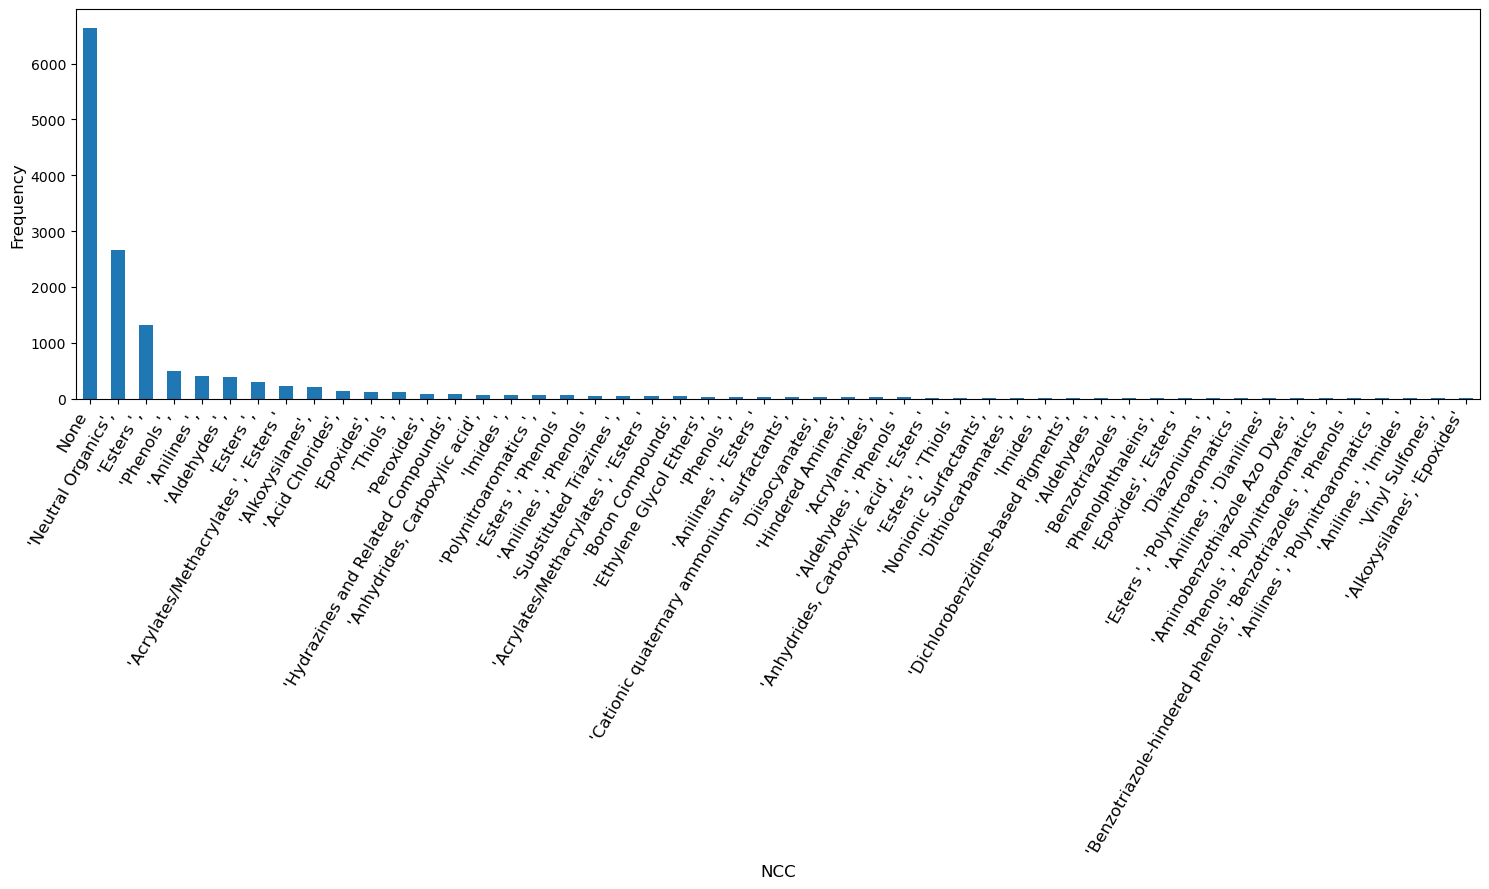

In [12]:
#| label: fig-NCC
#| fig-cap: 'Frequency of NCC membership, first 50 categories shown'

f, ax = plt.subplots(figsize = (15,9))
df1.head(50).NCC.plot.bar()
ax.set_xticklabels(df1['index'][:50],  rotation = 60,ha="right", fontsize = 12)
ax.set_ylabel('Frequency', fontsize =12)
ax.set_xlabel('NCC', fontsize =12)
plt.tight_layout();


In [13]:
chk = [e.strip(")").strip('(').strip('"').split(',') for e in df.NCC.unique().tolist() if pd.notnull(e)] 

In [176]:
#len([(e[0],e[1]) for e in chk if e[1] == ''])

## CLASSYFIRE

Since almost 47% of substances could not be assigned to a NCC, the ClassyFire taxonomy was used to assign substances into classes based on its chemical taxonomy. Substances that returned no taxonomy information was assigned to an arbitrary "Other" class. The majority of substances (13477) were assigned to the Organic compounds Kingdom. At the next level of granularity, Superclass was associated with 27 categories whereas a level down Class was associated with 270 unique categories. Given the objective of identifying 200-300 candidates for testing, using "Class' as a basis for the primary category (per @fig-categorisation) would rapidly exceed the number of practical categories from which to draw from. Exploring the frequency of the Superclass designation found that whilst there were 27 unique categories, 5 had memberships exceeding 1000. A hybrid approach of using Superclass as the primary category designation was taken for Superclasses than contained fewer than 1000 members whereas the 5 Superclasses (Benzenoids, Lipids and Lipid-like, Organoheterocyclic compounds, Organic acids and derivatives, Organic oxygen compounds) were expanded into their respective Class assignment. This resulted in 68 unique ClassyFire categories that formed the basis of the primary categories. The frequency of the TSCA Landscape across these ClassyFire primary categories is shown in  @fig-ClassyFire.

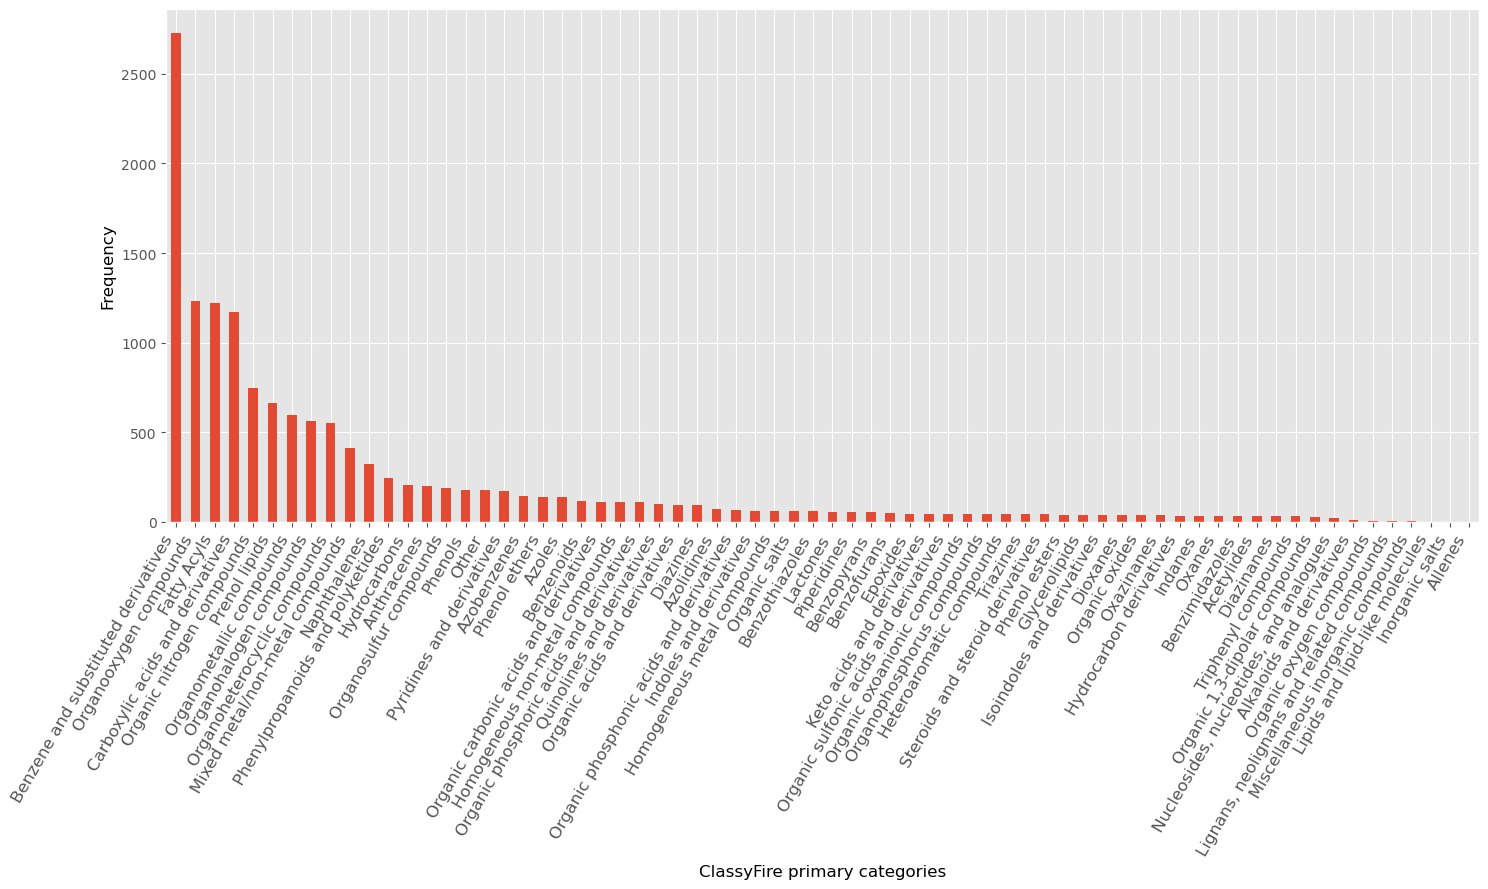

In [330]:
#| label: fig-ClassyFire
#| fig-cap: 'Frequency of ClassyFire primary categories'

f1, ax1 = plt.subplots(figsize = (15,9))
df.ClassyFire.value_counts().plot.bar()
ax1.set_xticklabels(ax1.get_xticklabels() , rotation = 60, ha="right", fontsize = 12)
ax1.set_ylabel('Frequency', fontsize =12)
ax1.set_xlabel('ClassyFire primary categories', fontsize =12)
plt.tight_layout();

In [37]:
#df[(df.NCC.isnull())]['Class'].value_counts().head(15)

Inspection of the substances without NCC assignment found that these were associated with ClassyFire Classes including Benzene, Organonitrogen compounds, Fatty Acyls, Carboxylic acids, Organooxygen, organometalloid and naphthalenes. 

SECONDARY-TERMINAL CATEGORISATION

Medoids were first calculated for each of the 68 primary categories. The pairwise Jaccard distance between the medoid and the remaining members of the category were computed. This was generated as a potential consideration for candidate chemical selection later - conceivably the medoid might not be feasible to test due to procurability issues but a close match on the basis of Jaccard distance might be a practical alternative. For primary categories containing less than 65 members, no further refinements were made - the primary category was effectively named as the terminal category. For primary categories with greater than 65 members of which there were 29 such categories, a hierarchical clustering was performed using Morgan fingerprints as inputs. The first generation of clusters were extracted for each primary category based on visual inspection of the dendrogram. These were arbitary tagged by 1,2,3 such that the secondary category was named using the primary category root + the cluster designation. For the 29 primary categories that contained more than 65 members, using the clustering approach resulted in an expansion to 141 secondary categories. Together with the 39 primary categories that contained less than 65 members, a total of 180 terminal categories were generated. @fig-terminal shows the 37 terminal categories that have a membership exceeding 100 substances.

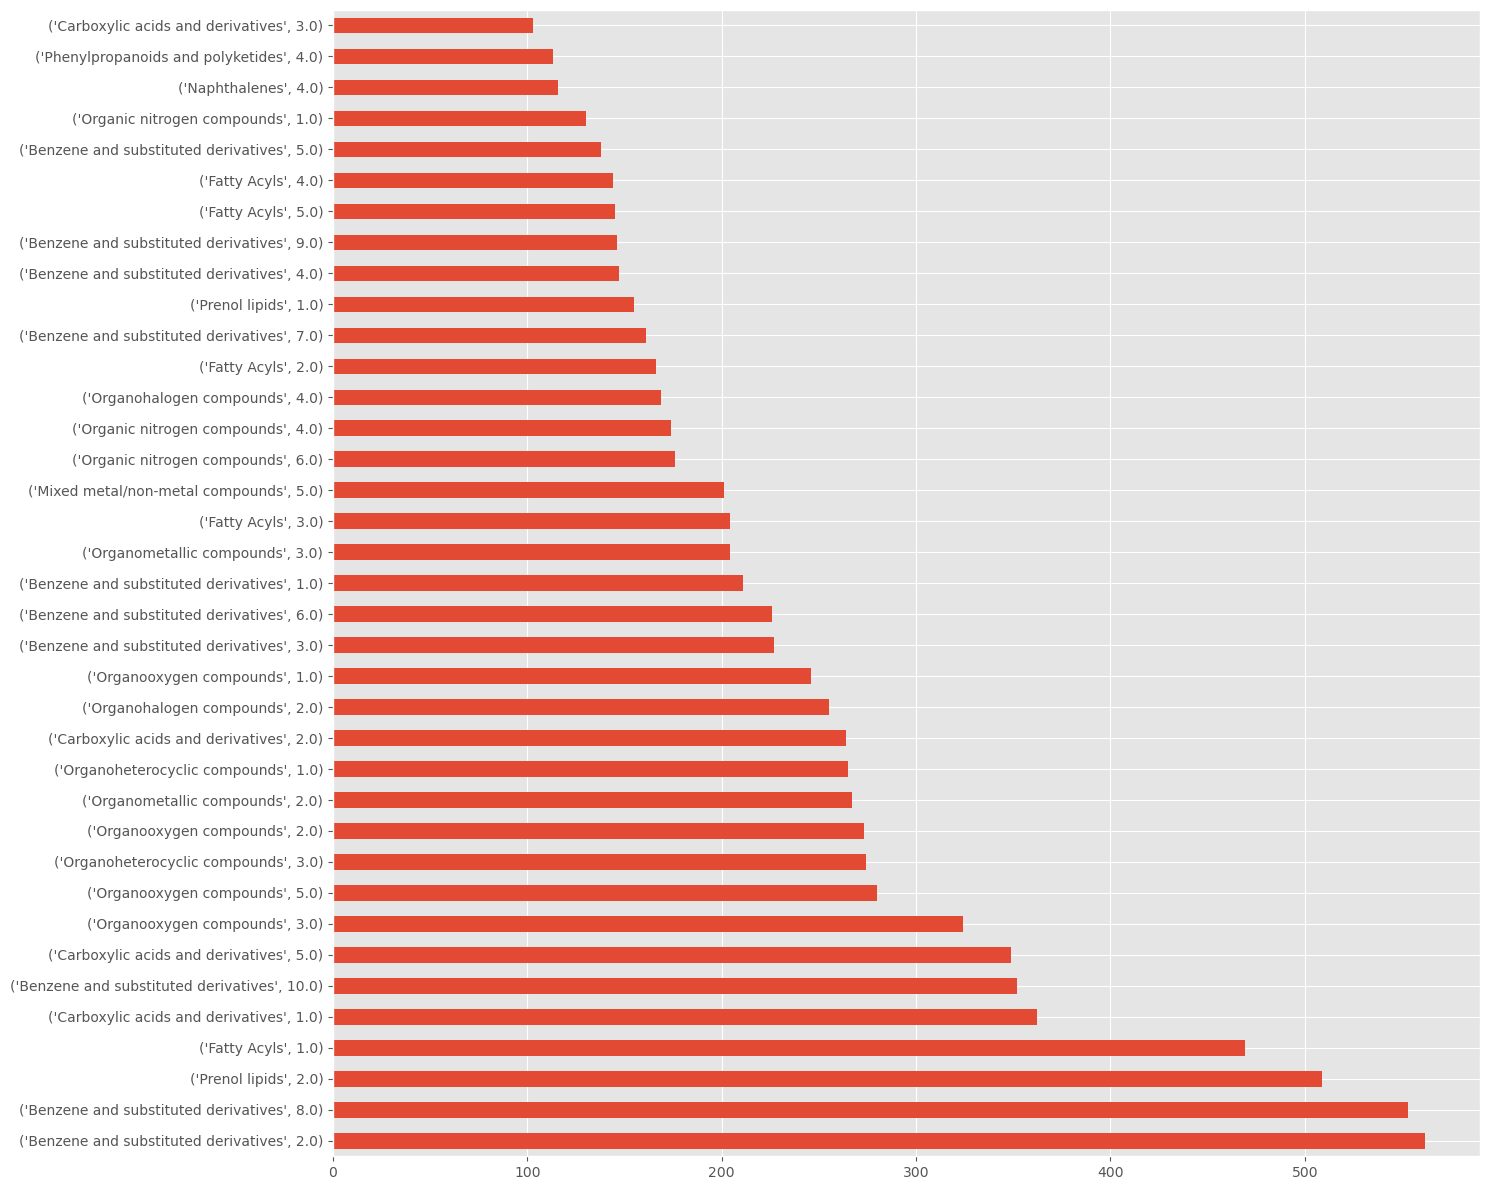

In [329]:
#| label: fig-terminal
#| fig-cap: 'Terminal categories exceeding 100 members'

df2 = pd.read_excel(interim_dir+'tsca_medoids_070823.xlsx')
value_counts = df2['group_str'].value_counts()
value_counts_aggregated = value_counts.copy()
value_counts_aggregated['misc'] = value_counts_aggregated[value_counts_aggregated < 40].sum()
plt.figure(figsize = (15,12))
value_counts_aggregated[(value_counts_aggregated >100) & (value_counts_aggregated < 750) ].plot(kind = 'barh')
plt.tight_layout()

DIVERSE SUBSTANCE SELECTION: FULL LANDSCAPE

Whilst medoids were selected as the most representative substance from each terminal category, a single chemical was unlikely to capture the breadth of diversity within a category. Additional substances to capture the breadth and structural diversity relied on the MaxMinPicker method. This method was used to select up to 5 further substances in addition to the centroid. For the terminal categories with fewer than 65 members, the MaxMin approach was feasible for 35 of the 39 relevant terminal cateories. No MaxMin approach was performed for terminal categories: Homogeneous metal compounds, Keto acids and derivatives, Organic salts and Organophosphorus compounds. A total of 189 diverse substances were selected from the 35 terminal categories. For the 141 terminal categories which originated from the primary categories with more than 65 members, the MaxMin was applicable to 139 categories. a total of 278 substances were identified following the MaxMin approach.

CONSTRAINED INVENTORY

The TSCA Landscape was filtered to only consider substances that could be potentially procured based on the number of Pubchem vendors, was of the appropriate physical form (based on melting point and boiling point considerations) and had not been tested in the ToxCast assays previously. Based on these considerations, 7565 substances were tagged as potentially screenable for NAM assays spanning 160 (89%) of the 180 terminal categories. 

DIVERSE SUBSTANCE SELECTION: SCREENABLE LANDSCAPE

The MaxMin approach could be applied to 146 of the 160 terminal categories. A total of 438 diverse substances were selected as a result of the MaxMin approach. The terminal categories where a MaxMin approach was not performed are listed in Table 2.

Table 2. List of the 14 terminal categories where a MaxMin approach was not applied

Terminal Category | Category Size|
|:---:|:----:|
| (Alkaloids and derivatives, nan) |3|
 |(Azobenzenes, 1.0) |4|
 | (Azoles, 3.0)|4|
 |(Azolidines' 1.0)|3|
 |(Azolidines, 5.0)|4|
 |(Benzenoids, 4.0)|5|
 |(Homogeneous non-metal compounds, 3.0)|1|
 | Hydrocarbon derivatives', nan) | 3|
 |(Lignans, neolignans and related compounds, nan)|4|
 |(Lipids and lipid-like molecules, nan) |1|
 |(Organic oxygen compounds, nan)|4|
 |(Organic phosphoric acids and derivatives, 3.0)|2|
 |(Other, 3.0)|4|
 |(Quinolines and derivatives, 1.0)|3|

FINAL PROPOSED SELECTIONS

In terms of proposing a final set of substances for testing, substances were selected from the screenable landscape targeting termminal categories that had membership sizes greater than 20 but less than 300. @fig-catsize shows the broad category membership sizes across the terminal categories. With these constraints, 318 candidate substances that spanned 108 terminal categories were proposed for testing. 

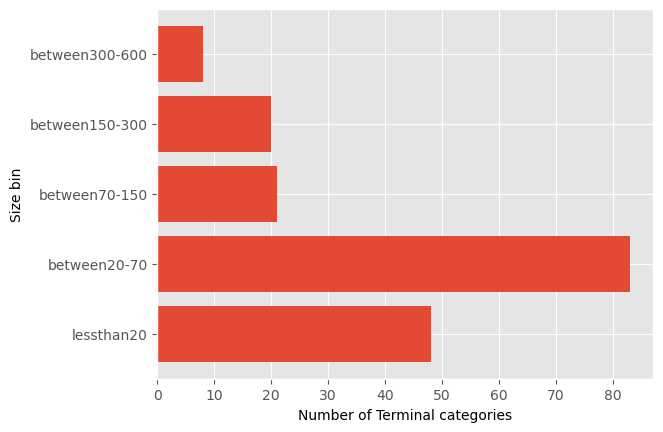

In [370]:
#| label: fig-catsize
#| fig-cap: 'Terminal categoriy membership size'

sizes = {
    'lessthan20': 48,
    'between20-70': 83,
 'between70-150': 21,
 'between150-300': 20,
 'between300-600': 8,
 }

fig, ax = plt.subplots()
ax.barh( [1,2,3,4,5],sizes.values())
ax.set_yticks([1,2,3,4,5])
ax.set_yticklabels(list(sizes.keys()))
ax.set_yticklabels(labels = sizes.keys())
ax.set_ylabel('Size bin')
ax.set_xlabel('Number of Terminal categories');

PROFILING OF SELECTED CANDIDATE SUBSTANCES

STRUCTURAL DIVERSITY

The TSCA Landscape was projected onto 2D using a t-TSNE plot and colour coded in 2 ways; 1) using a tag of screenable to permit a comparison of the structural coverage of the screenable library relative to the full Landscape and 2) using a tag of the proposed candidates for testing. @fig-tsne (a) shows the screenable tag where 1 denotes substance that is member of the screenable inventory whereas @fig-tsne (b) shows the structural coverage tagged by 1 to indicate proposed candidate substance for NAM testing.

In [436]:
tsne_df= pd.read_csv(interim_dir+'tsne_df_080823.csv', index_col = [0])


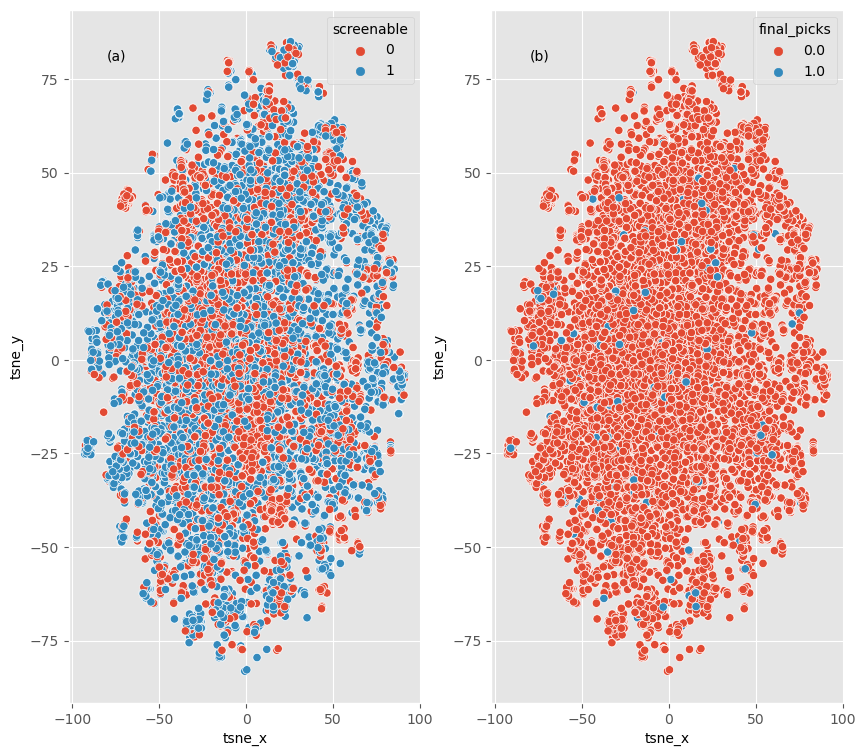

In [450]:
#| label: fig-tsna
#| fig-cap: 'Terminal categoriy membership size'

fig, ax = plt.subplots(1,2,figsize = (10,9))

sns.scatterplot(x="tsne_x", y="tsne_y",
                     data=tsne_df, hue = 'screenable', ax = ax[0])
sns.scatterplot(x="tsne_x", y="tsne_y",
                     data=tsne_df, hue = 'final_picks', ax = ax[1])
ax[0].text(-80, 80, "(a)", horizontalalignment='left', size='medium', color='black', )
ax[1].text(-80, 80, "(b)", horizontalalignment='left', size='medium', color='black', );

OPERA Physicochemical properties

In [371]:
df4 = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_080823.xlsx', sheet_name = 'All data')

In [375]:
#df4[df4['final_picks']==1]['group_str'].nunique()

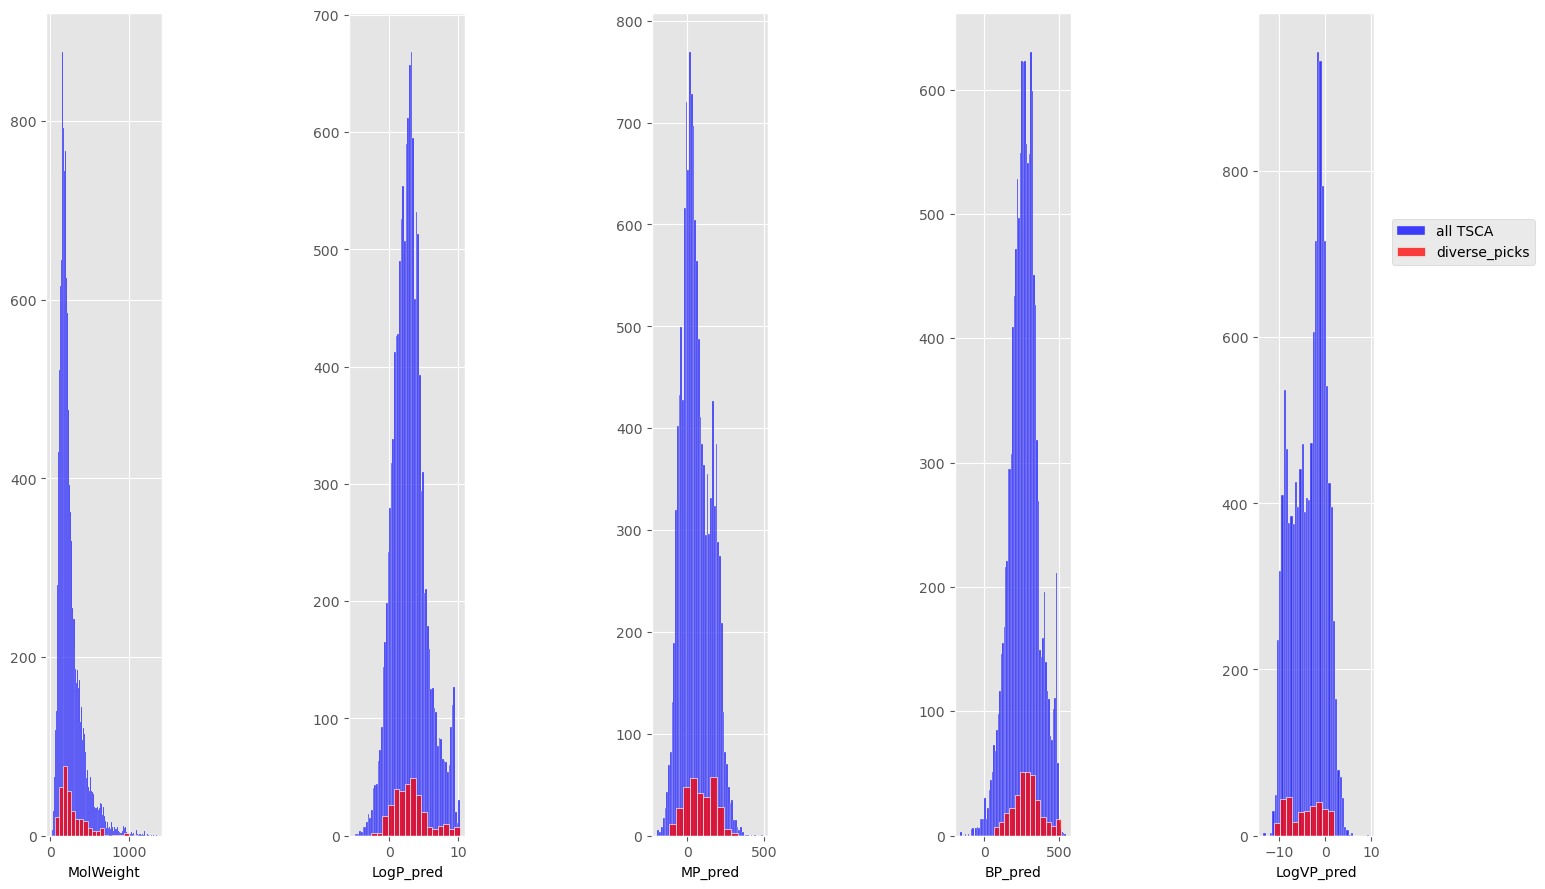

In [372]:
#| label: fig-OPERA
#| fig-cap: 'Physical property profiles between full inventory and candidate selections'


f2 = plt.figure(figsize = (20,9))
k=0
for n, e in enumerate( ['MolWeight','LogP_pred','MP_pred','BP_pred','LogVP_pred']):
    ax = plt.subplot(1,7, n+1)
    g = sns.histplot(df4[e], color = 'b', ax = ax, label = 'all TSCA')
    g = sns.histplot(df4[df4['final_picks']==1][e], color = 'r', ax = ax, label = 'diverse_picks')
    ax.set_ylabel("");
    #plt.subplots_adjust(hspace = 0.8)
handles, labels = ax.get_legend_handles_labels()
#print(handles)
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.15,0.75), loc=2, borderaxespad=0.);
plt.tight_layout();

In [411]:
df5 = pd.melt(df4, id_vars = ['dtxsid', 'final_picks'], value_vars = ['MolWeight','LogP_pred','MP_pred','BP_pred','LogVP_pred'])
#f, ax = plt.subplots()
df5['final_picks'] = df5['final_picks'].replace(np.nan, 0)

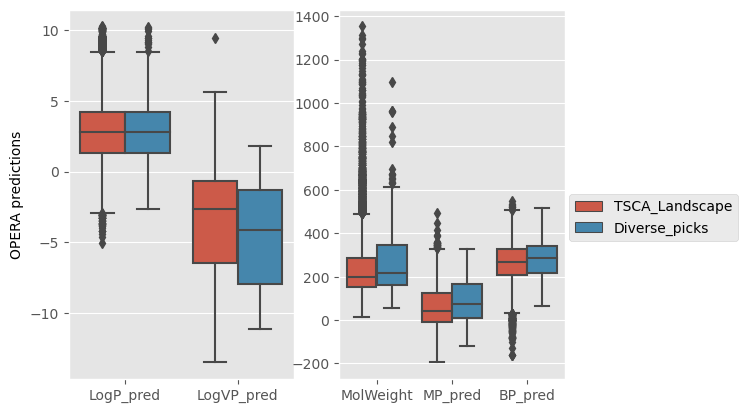

In [433]:
#| label: fig-OPERA2
#| fig-cap: 'Physical property profiles between full inventory and candidate selections'


df5['final_picks'] = df5['final_picks'].replace({0:'TSCA_Landscape', 1: 'Diverse_picks'})
fig, ax = plt.subplots(1,2)
sns.boxplot(x = 'variable', y = 'value', hue = 'final_picks',data = df5[df5['variable'].isin(['LogP_pred', 'LogVP_pred'])], ax = ax[0])
sns.boxplot(x = 'variable', y = 'value', hue = 'final_picks',data = df5[~df5['variable'].isin(['LogP_pred', 'LogVP_pred'])], ax = ax[1])
ax[1].set_ylabel("")
ax[0].set_ylabel('OPERA predictions')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].get_legend().set_visible(False)
ax[1].legend(bbox_to_anchor=(1.02, 0.5), loc='upper left', borderaxespad=0, title='');

PROFILING USING DEREK PREDICTIONS

Derek Nexus predictions were made for all TSCA Landscape substances and summarised in a bit vector format so that each substance was associated with a fingerprint made up of all possible endpoint-toxicophores present. Pairwise distance matrices of the Derek fingerprints were computed to explore the extent to which there was consistency in alert profile across each terminal category. Four terminal categories are illustrated in @fig-derek to show the extent to which alert profiles varied. 

In [451]:
import pickle

dists = pickle.load(open(interim_dir+ "dists_derek_080823.pkl", "rb" ) )


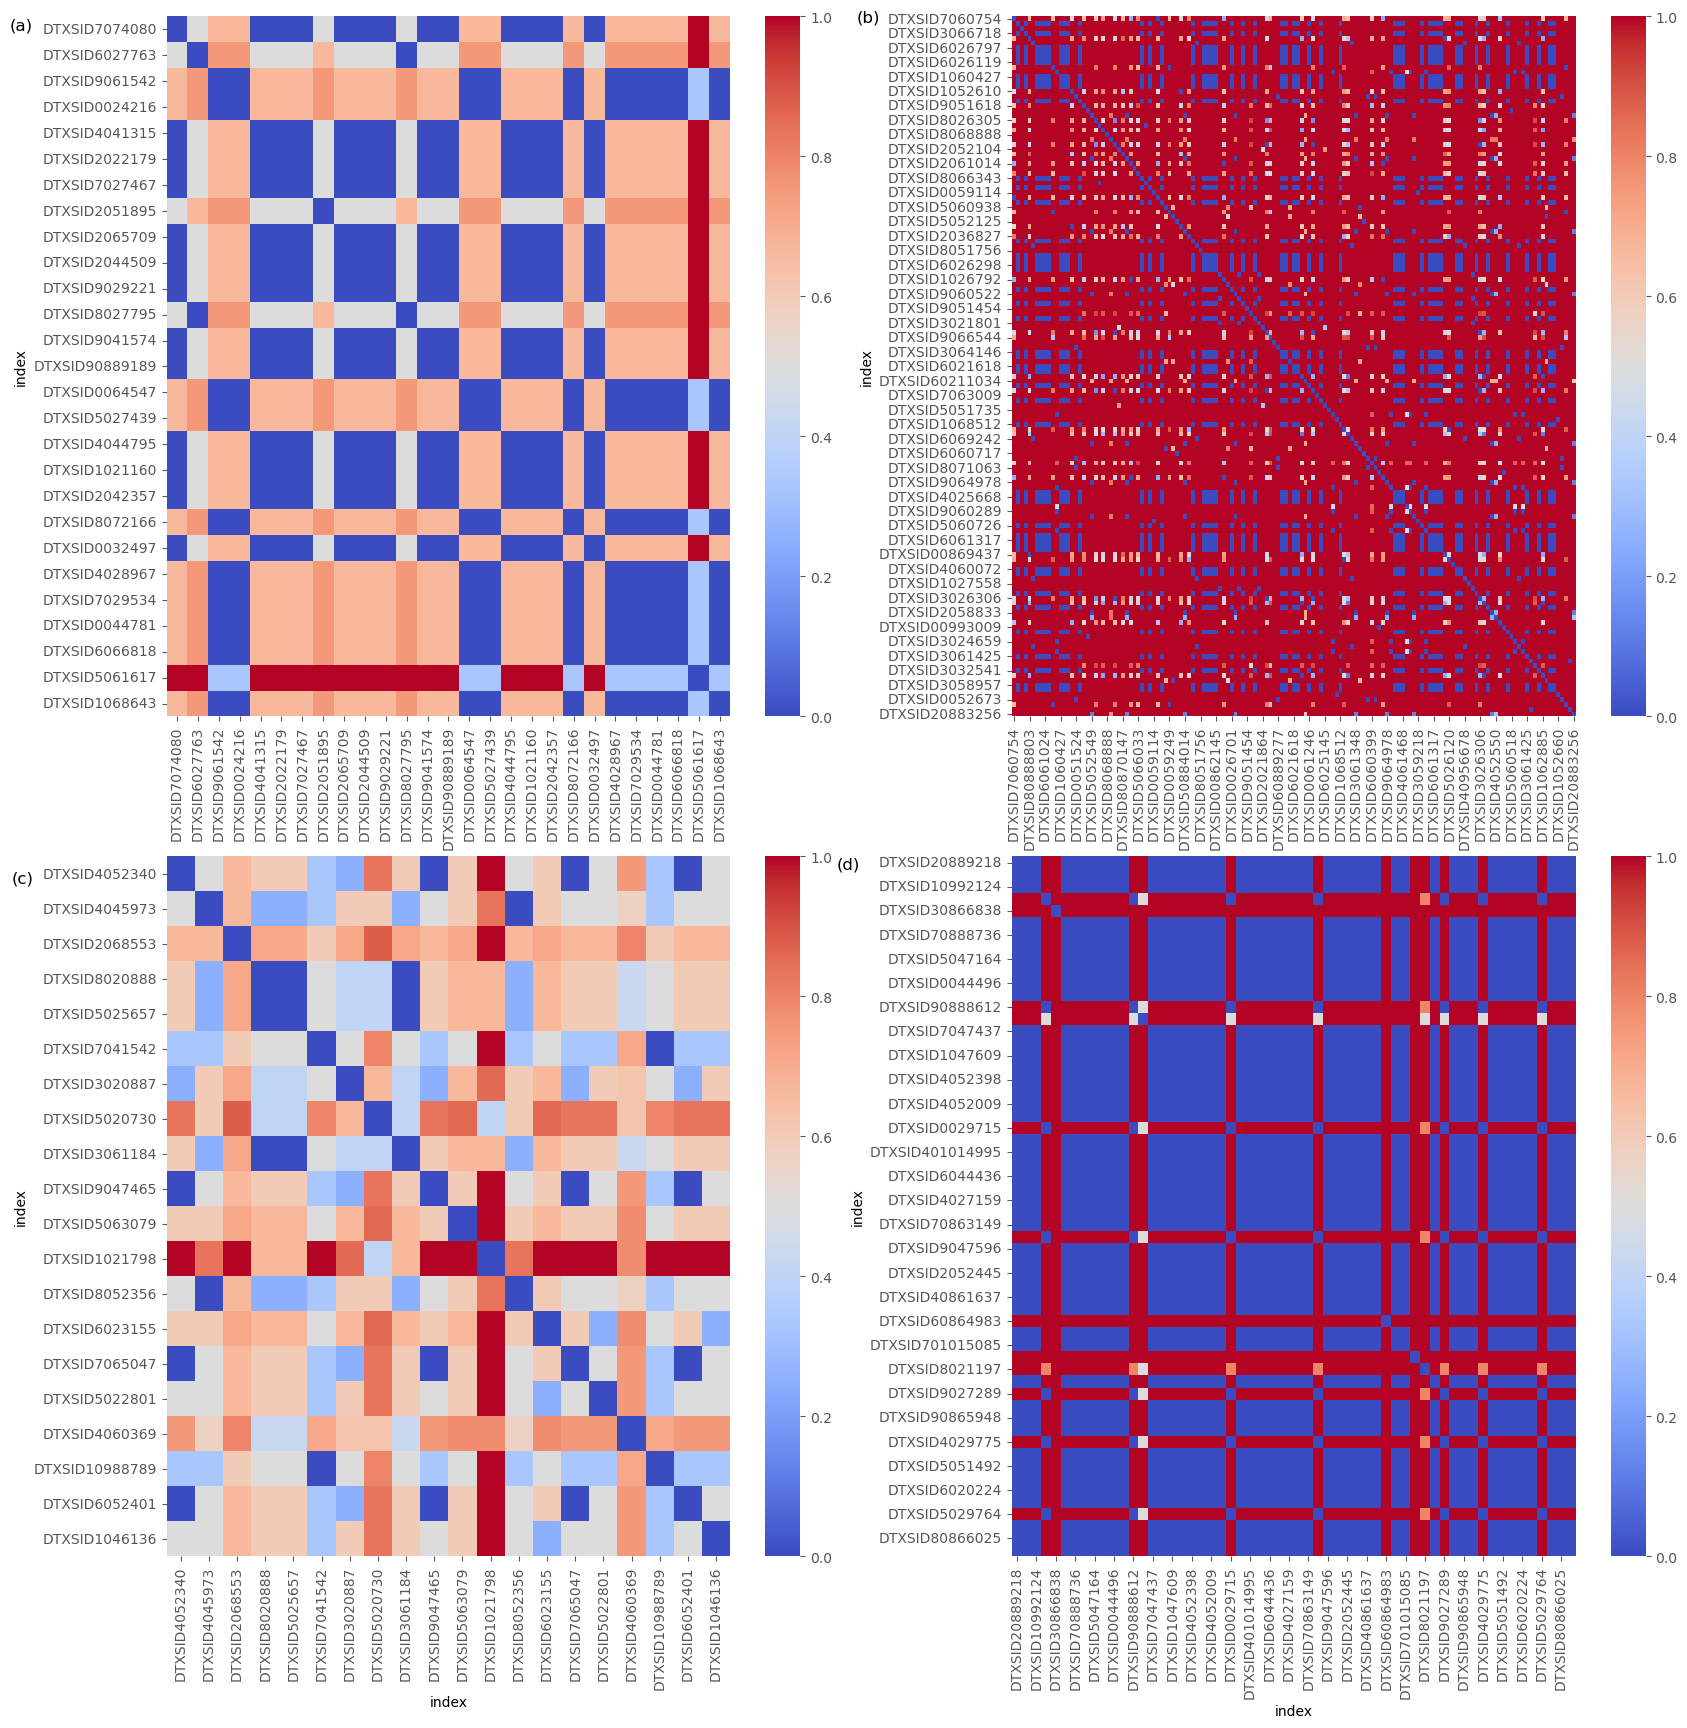

In [498]:
#| label: fig-derek
#| fig-cap: 'Heatmap of the pairwise distance matrices of selected terminal categories'


f, ax = plt.subplots(2,2, figsize = (20,20))
sns.heatmap(dists["('Pyridines and derivatives', 1.0)"], cmap = 'coolwarm', ax = ax[0,0])
sns.heatmap(dists["('Benzene and substituted derivatives', 9.0)"], cmap = 'coolwarm', ax = ax[0,1])
sns.heatmap(dists["('Quinolines and derivatives', 3.0)"], cmap = 'coolwarm', ax = ax[1,0])
sns.heatmap(dists["('Lactones', nan)"], cmap = 'coolwarm', ax = ax[1,1])


ax[0,0].text(-7.5,0.5, "(a)", horizontalalignment='left', size='large', color='black', )
ax[0,1].text(-40,1, "(b)", horizontalalignment='left', size='large', color='black', )
ax[1,0].text(-5.5, 0.75, "(c)", horizontalalignment='left', size='large', color='black', )
ax[1,1].text(-18,1, "(d)", horizontalalignment='left', size='large', color='black', );

Figures (a - d) represent terminal categories ('Pyridines and derivatives', 1.0), ('Benzene and substituted derivatives', 9.0), ('Benzene and substituted derivatives', 9.0) and ('Lactones', nan) respectively.